# **Nama : Marcel Kurniawan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path_aapl = "/content/drive/MyDrive/UAS_DeepLearning/AAPL.csv"
path_amd = "/content/drive/MyDrive/UAS_DeepLearning/AMD.csv"

In [ ]:
aapl = pd.read_csv(path_aapl,parse_dates=['Date'],index_col=['Date'])
amd = pd.read_csv(path_amd,parse_dates=['Date'],index_col=['Date'])

# **2a. Explorasi, praproses data dan splitting data**

Pada tahap ini saya melakukan beberapa eksplorasi untuk menemukan problem dari data ini yang nantinya akan dilakukan praproses data setelahnya.

### **Ekplorasi dataset**

In [ ]:
aapl.shape

(9909, 6)

In [ ]:
amd.shape

(10098, 6)

Dataset AAPL memiliki observasi 9909 dengan kolom sebanyak 7

Dataset AMD memiliki observasi 10098 dengan kolom sebanyak 7

In [ ]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [ ]:
miss_aapl = aapl.isnull().sum()
print("Missing value in Apple stock dataframe:", miss_aapl)

Missing value in Apple stock dataframe: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
miss_amd = amd.isnull().sum()
print("Missing value in AMD stock dataframe:", miss_amd)

Missing value in AMD stock dataframe: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Pada dataset Apple dan AMD tidak terdapat missing value.

In [ ]:
duplicated_aapl = aapl.duplicated().sum()
print("Duplicated value in Apple stock dataframe:", duplicated_aapl)

Duplicated value in Apple stock dataframe: 0


In [ ]:
duplicated_amd = amd.duplicated().sum()
print("Duplicated value in AMD stock dataframe:", duplicated_amd)

Duplicated value in AMD stock dataframe: 0


Pada dataset Apple dan AMD tidak terdapat duplicated value.

In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB


In [ ]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


Dataset Apple dan AMD ini sama-sama memiliki 6 fitur dan terdiri dari 5 fload dan 1 integer. Fitur pada dataset ini sudah memiliki tipe data yang sesuai.

Tidak ditemukan problem pada dataset ini.

## **Praproses data**

Pada tahap praposes ini, fitur yang akan dipertahankan hanyalah Date dan Close sehingga fitur sisanya tidak digunakan.

In [ ]:
aapl_price=pd.DataFrame(aapl['Close']).rename(columns={'Close':'Price'})
aapl_price.head(5)

,Price
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [ ]:
amd_price=pd.DataFrame(amd['Close']).rename(columns={'Close':'Price'})
amd_price.head(5)

,Price
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


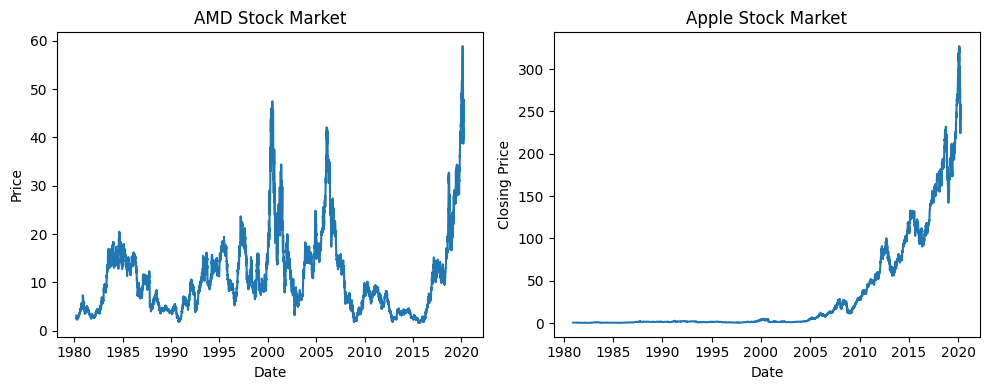

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(amd_price['Price'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('AMD Stock Market')

ax2.plot(aapl_price['Price'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Closing Price')
ax2.set_title('Apple Stock Market')

plt.tight_layout()
plt.show()

Berikut adalah line chart yang menunjukan perubahan harga saham Apple dan AMD dalam kurun waktu 1980 hingga 2020

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = ["Price"]
aapl_price[scaled_data] = scaler.fit_transform(aapl_price[scaled_data])
aapl_price.head(5)

,Price
Date,
1980-12-12,0.000969
1980-12-15,0.000887
1980-12-16,0.000778
1980-12-17,0.000812
1980-12-18,0.000853


In [ ]:
scaler = MinMaxScaler()

scaled_data = ["Price"]
amd_price[scaled_data] = scaler.fit_transform(amd_price[scaled_data])
amd_price.head(5)

,Price
Date,
1980-03-17,0.026638
1980-03-18,0.024638
1980-03-19,0.024820
1980-03-20,0.024274
1980-03-21,0.022637


Pada bagian praproses data saya juga melakukan scaling pada dataset Apple dan AMD, alasanya karena Transformer merupakan algoritma yang berbasis gradien sehingga dengan dilakukanya scaling mungkin dapat membantu dalam mempercepat konvergensi. Dengan skala yang serupa, model Transformer lebih mungkin untuk mencapai hasil yang optimal lebih cepat.

## **Pisahkan data time series tersebut menjadi dua bagian input dan output**

In [ ]:
import numpy as np
import datetime

def convert_str_to_datetime(date_string):
    split_date = date_string.split('-')
    year, month, day = int(split_date[0]), int(split_date[1]), int(split_date[2])
    return datetime.datetime(year=year, month=month, day=day)

def create_windowed_dataframe(dataframe, start_date_str, end_date_str, window_size=5):
    start_date = convert_str_to_datetime(start_date_str)
    end_date = convert_str_to_datetime(end_date_str)

    target_date = start_date

    dates = []
    X, Y = [], []

    is_last_iteration = False
    while True:
        subset_df = dataframe.loc[:target_date].tail(window_size + 6)

        if len(subset_df) != window_size + 6:
            print(f'Error: Window of size {window_size} is too large for date {target_date}')
            return

        values = subset_df['Price'].to_numpy()
        x, y = values[:window_size], values[window_size : window_size + 6]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date : target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if is_last_iteration:
            break

        target_date = next_date

        if target_date == end_date:
            is_last_iteration = True

    windows_df = pd.DataFrame({})
    windows_df['Target Date'] = dates

    X = np.array(X)
    Y = np.array(Y)
    for i in range(0, window_size):
        X[:, i]
        windows_df[f'Input(Target-{window_size - i})'] = X[:, i]

    for i in range(0, window_size):
        Y[:, i]
        windows_df[f'(Target-{i + 1})'] = Y[:, i]

    return windows_df

In [ ]:
windowed_aapl = create_windowed_dataframe(aapl_price,'1980-12-29','2020-04-01', window_size=5)
windowed_amd = create_windowed_dataframe(amd_price,'1980-03-31','2020-04-01', window_size=5)

Kode diatas berfungsi untuk merubah dataframe yang lama menjadi dataframe yang berisikan sesuai dengan ukuran dari windows dan juga horizon, dimana parameter window menentukan jumlah waktu (observasi) yang digunakan sebagai fitur atau input untuk memprediksi nilai target di masa depan. Sedangkan horizon telah disesuaikan dalam kode ini.

In [ ]:
windowed_aapl.head(5)

,Target Date,Input(Target-5),Input(Target-4),Input(Target-3),Input(Target-2),Input(Target-1),(Target-1),(Target-2),(Target-3),(Target-4),(Target-5)
0,1980-12-29,0.000969,0.000887,0.000778,0.000812,0.000853,0.000942,0.001017,0.001085,0.001174,0.001338
1,1980-12-30,0.000887,0.000778,0.000812,0.000853,0.000942,0.001017,0.001085,0.001174,0.001338,0.001365
2,1980-12-31,0.000778,0.000812,0.000853,0.000942,0.001017,0.001085,0.001174,0.001338,0.001365,0.001317
3,1981-01-02,0.000812,0.000853,0.000942,0.001017,0.001085,0.001174,0.001338,0.001365,0.001317,0.001263
4,1981-01-05,0.000853,0.000942,0.001017,0.001085,0.001174,0.001338,0.001365,0.001317,0.001263,0.001283


In [ ]:
def windowed_dataframe_to_date(windowed_df):
    df_np = windowed_df.to_numpy()

    dates = df_np[:, 0]

    input_matrix = df_np[:, 1:6]
    X = input_matrix.reshape((len(dates), input_matrix.shape[1], 1))
    Y = df_np[:, 6:11]

    return dates, X.astype(np.float32), Y.astype(np.float32)

aapl_date, Xapl_data, yapl_data = windowed_dataframe_to_date(windowed_aapl)
amd_date, Xamd_data, yamd_data = windowed_dataframe_to_date(windowed_amd)

Setelah itu proses berikutnya adalah merubah dataframe tersebut kedalam bentuk array.

## **Pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)**

### Splitting untuk dataset Apple

In [ ]:
split_size=int(0.8*len(aapl_date))
split_size_val=int(0.9*len(aapl_date))

apl_date_train, Xapl_train, yapl_train = aapl_date[:split_size], Xapl_data[:split_size], yapl_data[:split_size]
apl_date_val, Xapl_val, yapl_val = aapl_date[split_size:split_size_val], Xapl_data[split_size:split_size_val], yapl_data[split_size:split_size_val]
apl_date_test, Xapl_test, yapl_test = aapl_date[split_size_val:], Xapl_data[split_size_val:], yapl_data[split_size_val:]

In [ ]:
print("Shape of training set: {}".format(Xapl_train.shape))
print("Shape of val set: {}".format(Xapl_val.shape))
print("Shape of val set: {}".format(Xapl_test.shape))

Shape of training set: (7919, 5, 1)
Shape of val set: (990, 5, 1)
Shape of val set: (990, 5, 1)


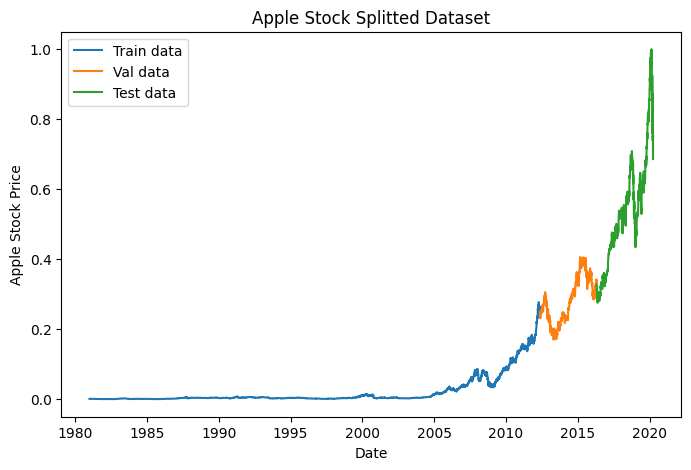

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(apl_date_train, yapl_train[:,0], label="Train data")
plt.plot(apl_date_val, yapl_val[:,0], label="Val data")
plt.plot(apl_date_test, yapl_test[:,0], label="Test data")
plt.title('Apple Stock Splitted Dataset')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

Dataset Apple sudah terbagi menjadi tiga bagian yaitu Training, Validation dan Testing

### Splitting untuk dataset AMD

In [ ]:
split_size=int(0.8*len(amd_date))
split_size_val=int(0.9*len(amd_date))

amd_date_train, Xamd_train, yamd_train = amd_date[:split_size], Xamd_data[:split_size], yamd_data[:split_size]
amd_date_val, Xamd_val, yamd_val = amd_date[split_size:split_size_val], Xamd_data[split_size:split_size_val], yamd_data[split_size:split_size_val]
amd_date_test, Xamd_test, yamd_test = amd_date[split_size_val:], Xamd_data[split_size_val:], yamd_data[split_size_val:]

In [ ]:
print("Shape of training set: {}".format(Xamd_train.shape))
print("Shape of val set: {}".format(Xamd_val.shape))
print("Shape of val set: {}".format(Xamd_test.shape))

Shape of training set: (8070, 5, 1)
Shape of val set: (1009, 5, 1)
Shape of val set: (1009, 5, 1)


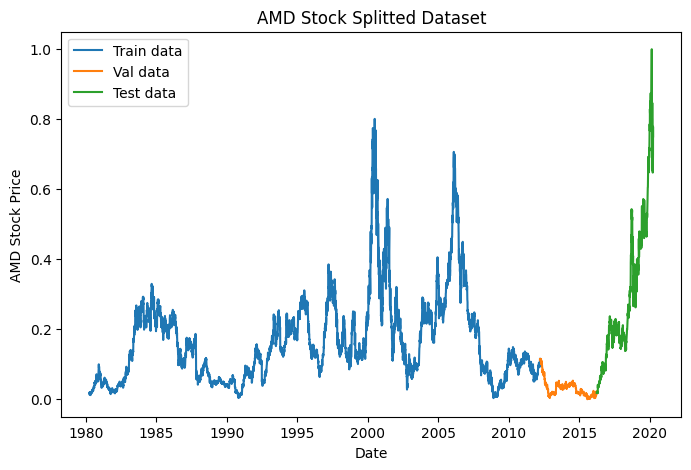

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(amd_date_train, yamd_train[:,0], label="Train data")
plt.plot(amd_date_val, yamd_val[:,0], label="Val data")
plt.plot(amd_date_test, yamd_test[:,0], label="Test data")
plt.title('AMD Stock Splitted Dataset')
plt.xlabel('Date')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

Dataset AMD sudah terbagi menjadi tiga bagian yaitu Training, Validation dan Testing

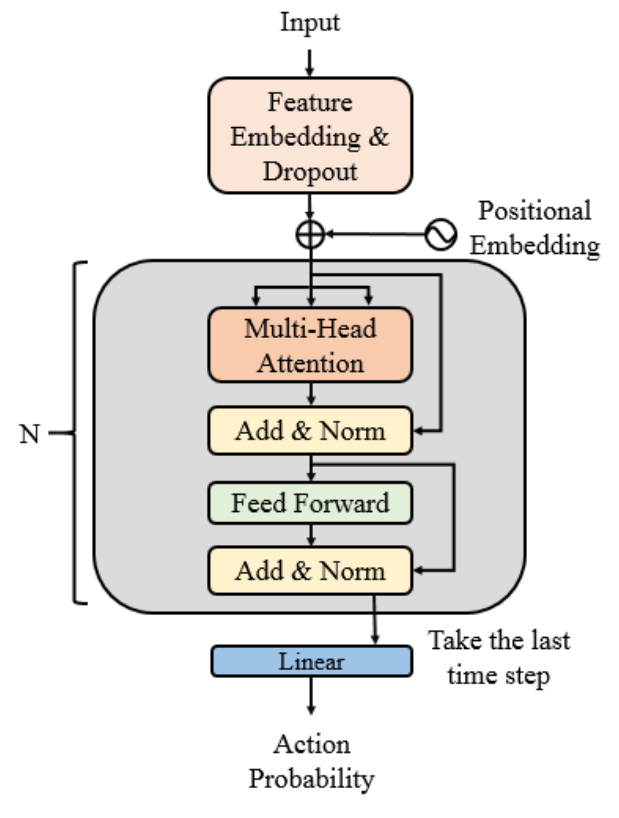

# **2b. Arsitektur Baseline**

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout):

    # Normalization and Multi-head Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=5, activation="relu")(x)
    x = layers.Dropout(dropout)(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(res)

    return x + res

In [ ]:
def build_model(input_shape,head_size,num_heads,ff_dim,num_transformer_blocks,dropout):
    # Feature embedding and dropout
    inputs = keras.Input(shape=input_shape)
    x = inputs

    # Positional Encoding
    positions = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(tf.range(input_shape[0], dtype=tf.float32))
    x = inputs + positions

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Output
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    outputs = layers.Dense(5)(x)
    return keras.Model(inputs, outputs)

In [ ]:
modelBase = build_model(input_shape=(5,1),head_size=256,num_heads=4,ff_dim=32,num_transformer_blocks=1,dropout=0.5)
modelBase.compile(optimizer="sgd", loss='mse', metrics=['RootMeanSquaredError'])
modelBase.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 5, 1)]       0           []                               
                                                                                                  
 tf.__operators__.add_78 (TFOpL  (None, 5, 1)        0           ['input_20[0][0]']               
 ambda)                                                                                           
                                                                                                  
 layer_normalization_60 (LayerN  (None, 5, 1)        2           ['tf.__operators__.add_78[0][0]']
 ormalization)                                                                                    
                                                                                           

Arsitektur baseline yang saya buat sesuai dengan kriteria soal dimana terdapat encoder block dan bagian Feed Forward hanya menggunakan satu layer Conv1D dengan Activation function menggunakan ReLU dan bagian node Perceptron pada output telah disesuaikan dengan horizon datanya yang berjumlah 5.

Disini saya mencoba untuk menggunakan 1 blok transformer, dan untuk arsitektur baseline ini saya juga menggunakan SGD sebagai optimizer.

In [ ]:
history_apl = modelBase.fit(Xapl_train, yapl_train, validation_data=(Xapl_val, yapl_val), epochs=5)

Epoch 1/5
248/248 [==============================] - 2s 8ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 2/5
248/248 [==============================] - 3s 12ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2135
Epoch 3/5
248/248 [==============================] - 2s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2118
Epoch 4/5
248/248 [==============================] - 2s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 5/5
248/248 [==============================] - 2s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0432 - val_root_mean_squared_error: 0.2079


In [ ]:
history_amd = modelBase.fit(Xamd_train, yamd_train, validation_data=(Xamd_val, yamd_val), epochs=5)

Epoch 1/5
253/253 [==============================] - 2s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 2/5
253/253 [==============================] - 2s 8ms/step - loss: 0.0071 - root_mean_squared_error: 0.0840 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0791
Epoch 3/5
253/253 [==============================] - 2s 8ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 4/5
253/253 [==============================] - 2s 8ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 5/5
253/253 [==============================] - 3s 11ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726


In [ ]:
loss_apl, rmse_apl = modelBase.evaluate(Xapl_test, yapl_test)
print("Apple Stock RMSE:", rmse_apl)

31/31 [==============================] - 0s 4ms/step - loss: 0.1735 - root_mean_squared_error: 0.4165
Apple Stock RMSE: 0.41652819514274597


In [ ]:
loss_amd, rmse_amd = modelBase.evaluate(Xamd_test, yamd_test)
print("AMD Stock RMSE:", rmse_amd)

32/32 [==============================] - 0s 4ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215
AMD Stock RMSE: 0.12152816355228424


Berdarkan hasil nilai evaluasi menggunakan metric RMSE, model transformer ini menunjukan performa yang buruk karena nilai RMSE yang didapat cukup besar, terutama pada data saham Apple. Oleh karena itu pada no 2c akan dilakukan modifikasi dan tuning model untuk mendapatkan performa yang lebih baik.

31/31 [==============================] - 0s 4ms/step


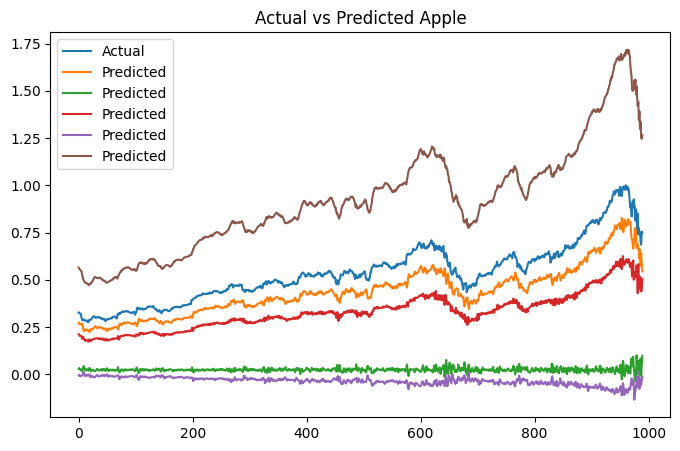

In [ ]:
yapl_pred = modelBase.predict(Xapl_test)

plt.figure(figsize=(8,5))
plt.plot(yapl_test[:,0], label='Actual')
plt.plot(yapl_pred, label='Predicted')
plt.title('Actual vs Predicted Apple')
plt.legend()
plt.show()

32/32 [==============================] - 0s 7ms/step


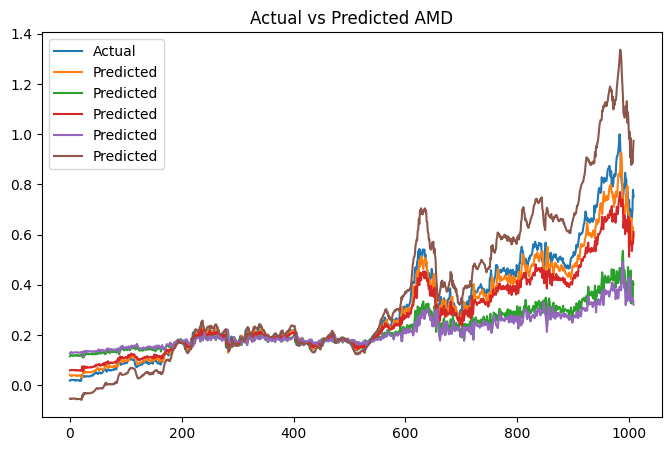

In [ ]:
yamd_pred = modelBase.predict(Xamd_test)

plt.figure(figsize=(8,5))
plt.plot(yamd_test[:,0], label='Actual')
plt.plot(yamd_pred, label='Predicted')
plt.title('Actual vs Predicted AMD')
plt.legend()
plt.show()

Dari kedua grafik ini pun kita dapat melihat bahwa ketika model diterapkan pada dataset Apple maupun AMD, keduanya sama-sama memberikan performa yang buruk. Bahkan untuk dataset apple, nilai yang diprediksi sangat jauh dengan nilai aktualnya.

# **2c. Modifikasi Arsitektur Baseline**

Pada no.2c saya tidak merubah susunan dari arsitektur baseline seperti batch normalization ataupun drop out layer, saya hanya melakukan tuning hyperparameter, parameter dan mengganti optimizer serta menambah jumlah dari block transformernya.

Alasan saya tidak merubah arsitektur ini karena ketika saya melakukan tuning terhadap hal-hal tersebut, performa yang cukup baik sudah saya dapatkan sehingga saya memilih untuk tidak menambahkan layer apapun kedalam arsitektur ini.


Berikut adalah list dan alasan saya melakukan tuning:

*   Menganti optimizer dari sgd menjadi adam karena, adam dapat menangani data yang tidak stasioner atau berubah seiring waktu, yang sering terjadi pada time series. Adam juga memiliki keunggulan dalam hal efisiensi komputasi dan memori dibandingkan dengan metode optimisasi sgd.

*   Menambahkan epoch dari 5 menjadi 10 untuk menemukan titik optimal dalam proses training, di mana model mampu mempelajari pola yang paling relevan pada data.

*   Saya mengurangi feed forward dimension menjadi 6 untuk mengurangi jumlah parameter yang harus dipelajari oleh model dan juga mencegah terjadinya overfitting.

*   Saya menambahkan batch size sebesar 64 untuk mempercepat proses training serta mengoptimalkan penggunaan sumber daya.

*   Saya menambahkan num_head menjadi 6 agar model memiliki kemampuan yang lebih besar untuk mengakses informasi yang relevan dalam data time series.

*   Saya menambahkan jumlah blok transformer menjadi 2 blok untuk meningkatan kapasitas dan kompleksitas model dalam menangani data.

*   Saya merubah nilai drop out dari 0.5 menjadi 0.3 untuk mengurangi overfitting dalam model.




In [ ]:
import tensorflow as tf

def build_model(input_shape,head_size,num_heads,ff_dim,num_transformer_blocks,dropout=0):
    # Feature embedding and dropout
    inputs = keras.Input(shape=input_shape)
    x = inputs

    # Positional Embedding
    positions = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(tf.range(input_shape[0], dtype=tf.float32))
    x = inputs + positions

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Output layer
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    outputs = layers.Dense(5)(x)
    return keras.Model(inputs, outputs)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout):

    # Normalization and Multi-head Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(res)

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=5, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    return x + res

In [ ]:
modelTune = build_model(input_shape=(5,1),head_size=256,num_heads=6,ff_dim=6,num_transformer_blocks=2,dropout=0.15)
modelTune.compile(optimizer="adam", loss='mse', metrics=['RootMeanSquaredError'])
modelTune.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 tf.__operators__.add_28 (TFOpL  (None, 5, 1)        0           ['input_7[0][0]']                
 ambda)                                                                                           
                                                                                                  
 layer_normalization_22 (LayerN  (None, 5, 1)        2           ['tf.__operators__.add_28[0][0]']
 ormalization)                                                                                    
                                                                                            

In [ ]:
history_apl_tune = modelTune.fit(Xapl_train, yapl_train, validation_data=(Xapl_val, yapl_val), epochs=10, batch_size=64)

Epoch 1/10
124/124 [==============================] - 17s 101ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0549 - val_root_mean_squared_error: 0.2342
Epoch 2/10
124/124 [==============================] - 11s 91ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 3/10
124/124 [==============================] - 9s 72ms/step - loss: 6.4440e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1264
Epoch 4/10
124/124 [==============================] - 10s 81ms/step - loss: 3.3844e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855
Epoch 5/10
124/124 [==============================] - 10s 79ms/step - loss: 1.5355e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550
Epoch 6/10
124/124 [==============================] - 10s 82ms/step - loss: 6.5007e-05 - root_mean_squared_error: 0.00

In [ ]:
history_amd_tune = modelTune.fit(Xamd_train, yamd_train, validation_data=(Xamd_val, yamd_val), epochs=10, batch_size=64)

Epoch 1/10
127/127 [==============================] - 16s 87ms/step - loss: 0.0237 - root_mean_squared_error: 0.1540 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0417
Epoch 2/10
127/127 [==============================] - 9s 72ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 3/10
127/127 [==============================] - 11s 87ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 4/10
127/127 [==============================] - 13s 100ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0384
Epoch 5/10
127/127 [==============================] - 11s 87ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 7.4168e-04 - val_root_mean_squared_error: 0.0272
Epoch 6/10
127/127 [==============================] - 9s 74ms/step - loss: 9.1950e-04 - root_mean_squared_error: 0.0303 - val_

# **2d. Evaluasi Arsitektur**

In [ ]:
loss_apl, rmse_apl = modelTune.evaluate(Xapl_test, yapl_test, verbose=1)
print("Apple Stock RMSE:", rmse_apl)

31/31 [==============================] - 0s 11ms/step - loss: 4.9028e-04 - root_mean_squared_error: 0.0221
Apple Stock RMSE: 0.02214226871728897


In [ ]:
loss_amd, rmse_amd = modelTune.evaluate(Xamd_test, yamd_test, verbose=1)
print("AMD Stock RMSE:", rmse_amd)

32/32 [==============================] - 0s 11ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373
AMD Stock RMSE: 0.03730987757444382


Pada bagian ini, evaluasi dilakukan terhadap model yang telah di tuning dengan menggunakan testing set untuk memprediksi nilai ground truth dengan predicted result. Dengan menggunakan metric RMSE nilai yang dihasilkan oleh model terhadap dataset Apple dan AMD dihasilkan nilai masing-masing sebesar 0.022 dan 0.037 yang menunjukan bahwa model memiliki tingkat kesesuaian yang relatif baik dalam memprediksi harga kedua dataset. Dengan kata lain, prediksi yang dihasilkan oleh model ini memiliki tingkat kesalahan yang relatif rendah dalam memperkirakan nilai-nilai sebenarnya dari harga saham Apple maupun AMD.

31/31 [==============================] - 1s 14ms/step


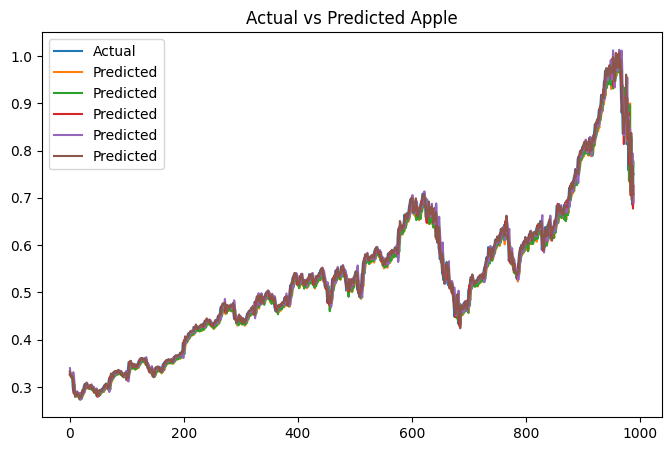

In [ ]:
yapl_pred = modelTune.predict(Xapl_test)

plt.figure(figsize=(8,5))
plt.plot(yapl_test[:,0], label='Actual')
plt.plot(yapl_pred, label='Predicted')
plt.title('Actual vs Predicted Apple')
plt.legend()
plt.show()

32/32 [==============================] - 1s 13ms/step


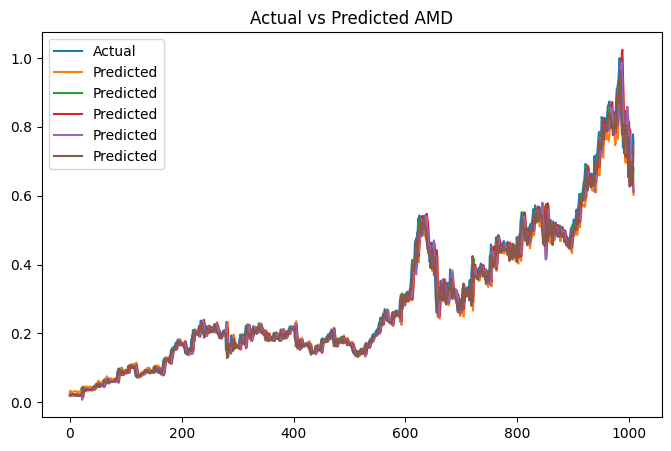

In [ ]:
yamd_pred = modelTune.predict(Xamd_test)

plt.figure(figsize=(8,5))
plt.plot(yamd_test[:,0], label='Actual')
plt.plot(yamd_pred, label='Predicted')
plt.title('Actual vs Predicted AMD')
plt.legend()
plt.show()

Selain itu hasil prediksi vs groundtruth dibanding melalui visualisasi, dapat dilihat bahwa nilai nilai prediksi dan nilai ground truth saling berhimpitan. Artinya nilai yang diprediksi oleh model yang telah dituning sudah sangat baik dan memberikan performa sangat baik ketika memprediksi nilai-nilai.

Dengan hasil melalui metrics RMSE dan Plot dapat dikatakan bahwa tuning yang dilakukan di no.2c sudah efektif dan optimal dalam meningkatkan performa model.